# Lecture 5 : Introduction to Deep Learning with Tensorflow and Keras

# 5.1: Introduction to Tensorflow

## Example of a Tensorflow Code:

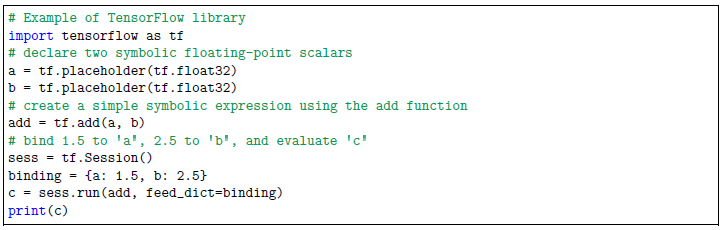

# 5.2: Introduction to Keras

## Theano and Tensorflow Backends for Keras

# Building Deep Learning Models with Keras:

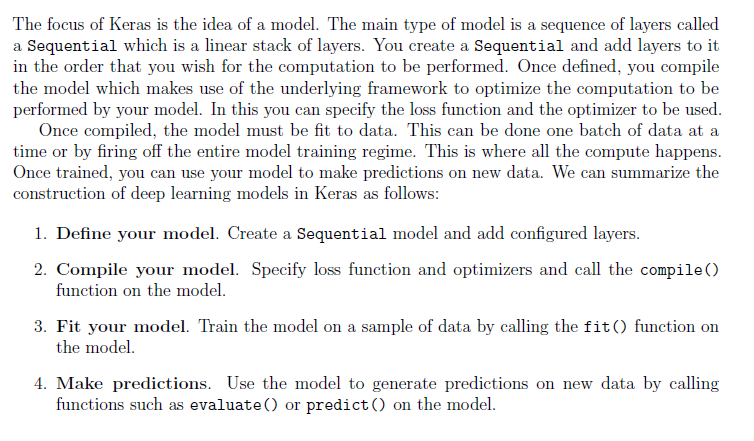

# 5.3: Multi-Layer Perceptrons:

## 5.3.1 : MLP/Neural Networks:

## Neurons

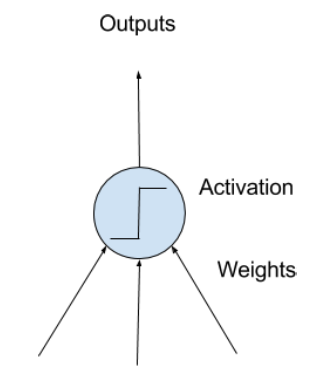

## Initialization

## Activation Function

## Neuron Weights

# Networks of Neurons:

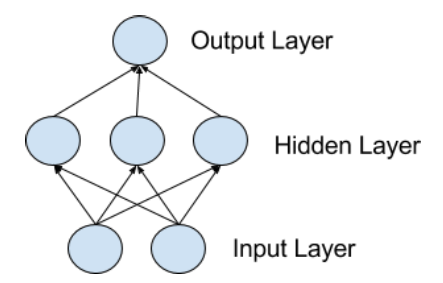

## Input Layer / Visible Layer

## Hidden Layer

## Output Layer

# 5.3.2:  Steps of Training a Network:

## 1. Data Preperation

## 2. Stochastic Gradient Descent

## 3. Weight Updates

# 5.4: Creating Your First Neural Network with Keras

## The Pima Indian Diabetes Dataset:

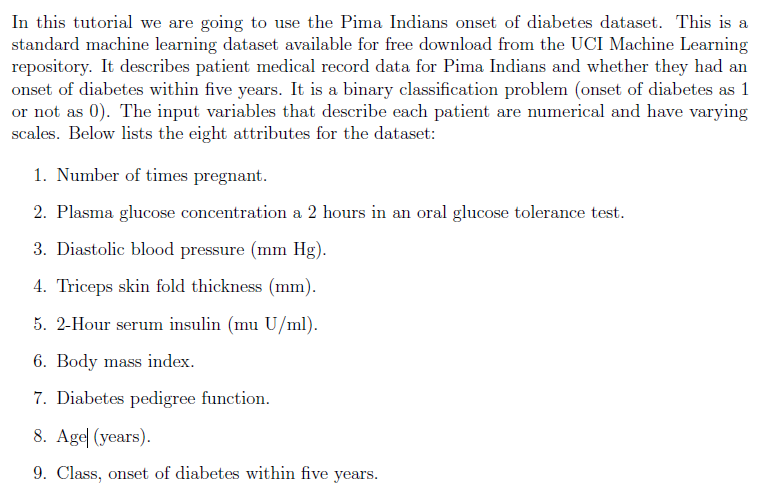

Dataset Link: http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data

### Calling Necessary Libraries, Setting Random Seed:

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

### Loading the Dataset:

In [ ]:
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

### Defining the Model:

In [ ]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, init= 'uniform' , activation= 'relu' ))
model.add(Dense(8, init= 'uniform' , activation= 'relu' ))
model.add(Dense(1, init= 'uniform' , activation= 'sigmoid' ))

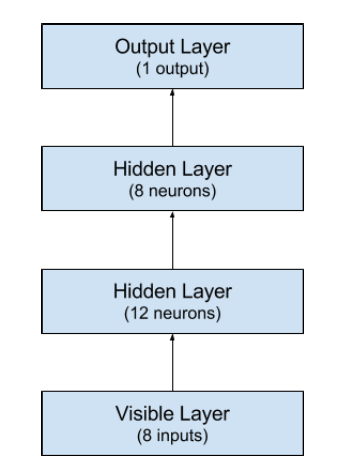

### Compiling the model:

In [ ]:
# Compile model
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

### Fitting the model:

In [ ]:
# Fit the model
model.fit(X, Y, nb_epoch=150, batch_size=100,verbose = 1)

### Evaluating the model:

In [ ]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

### Tieing it all together:

In [ ]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, init= 'uniform' , activation= 'relu' ))
model.add(Dense(8, init= 'uniform' , activation= 'relu' ))
model.add(Dense(1, init= 'uniform' , activation= 'sigmoid' ))
# Compile model
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
# Fit the model
model.fit(X, Y, nb_epoch=150, batch_size=10)
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# 5.5: Evaluating The performance of Deep learning models:

## Data Splitting

### Using an Automatic Verification Script:

In [ ]:
# MLP with automatic validation set
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, init= 'uniform' , activation= 'relu' ))
model.add(Dense(8, init= 'uniform' , activation= 'relu' ))
model.add(Dense(1, init= 'uniform' , activation= 'sigmoid' ))
# Compile model
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
# Fit the model
model.fit(X, Y, validation_split=0.33, nb_epoch=150, batch_size=10)

### Using a Manual Verification Dataset:

In [ ]:
# MLP with manual validation set
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# split into 67% for train and 33% for test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=seed)
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, init= 'uniform' , activation= 'relu' ))
model.add(Dense(8, init= 'uniform' , activation= 'relu' ))
model.add(Dense(1, init= 'uniform' , activation= 'sigmoid' ))
# Compile model
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test,y_test), nb_epoch=150, batch_size=10)

## Manual k-Fold Cross Validation:

In [ ]:
# MLP for Pima Indians Dataset with 10-fold cross validation
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []

for train, test in kfold.split(X, Y):
    
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, init= 'uniform' , activation= 'relu' ))
    model.add(Dense(8, init= 'uniform' , activation= 'relu' ))
    model.add(Dense(1, init= 'uniform' , activation= 'sigmoid' ))
    
    # Compile model
    model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    
    # Fit the model
    model.fit(X[train], Y[train], nb_epoch=150, batch_size=100, verbose=0)
    
    # evaluate the model
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

# 5.6: Using Keras Models with Scikit-Learn for General Machine Learning

## 5.6.1: Evaluating models with cross validation:

In [ ]:
# MLP for Pima Indians Dataset with 10-fold cross validation via sklearn
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy

# Function to create model, required for KerasClassifier
def create_model():
    
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, init= 'uniform' , activation= 'relu' ))
    model.add(Dense(8, init= 'uniform' , activation= 'relu' ))
    model.add(Dense(1, init= 'uniform' , activation= 'sigmoid' ))
    
    # Compile model
    model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# create model
model = KerasClassifier(build_fn=create_model, nb_epoch=150, batch_size=10, verbose=1)

# evaluate using 10-fold cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

## 5.6.2: Grid Search Deep Learning Model Parameters:

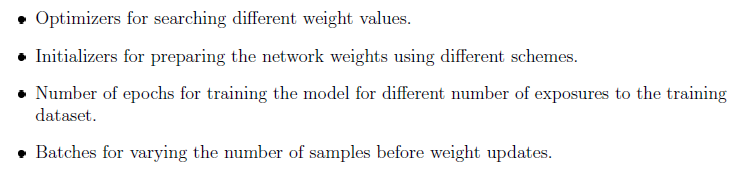

In [ ]:
# MLP for Pima Indians Dataset with grid search via sklearn
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

import numpy

# Function to create model, required for KerasClassifier
def create_model(optimizer= 'rmsprop' , init= 'glorot_uniform' ):
    
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, init=init, activation= 'relu' ))
    model.add(Dense(8, init=init, activation= 'relu' ))
    model.add(Dense(1, init=init, activation= 'sigmoid' ))
    
    # Compile model
    model.compile(loss= 'binary_crossentropy' , optimizer=optimizer, metrics=[ 'accuracy' ])
    return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# grid search epochs, batch size and optimizer
optimizers = [ 'rmsprop' , 'adam' ]
init = [ 'glorot_uniform' , 'normal' , 'uniform' ]
epochs = numpy.array([50, 100, 150])
batches = numpy.array([50, 100, 200])
param_grid = dict(optimizer=optimizers, nb_epoch=epochs, batch_size=batches, init=init)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

# 5.7:  Multiclass Classification of Flower Species

## Iris Flower Classification Dataset

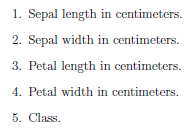

Dataset Link: http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

### Import Classes and functions:

In [ ]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

### Initialize Random Number Generator:

In [ ]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

### Loading the Dataset:

In [ ]:
# load dataset
dataframe = pandas.read_csv("iris.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

In [ ]:
dataframe

### Encoding the output Variable

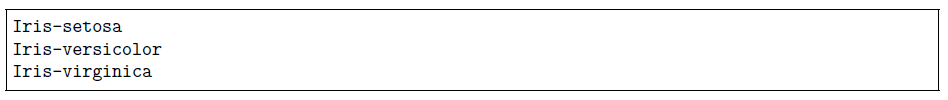

One Hot Encoding:

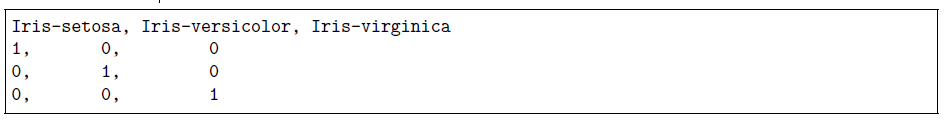

In [ ]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

### Defining the Neural Network:

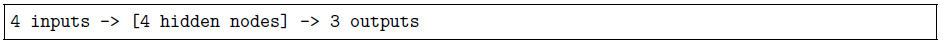

In [ ]:
# define baseline model
def baseline_model():
    
    # create model
    model = Sequential()
    model.add(Dense(4, input_dim=4, init= 'normal' , activation= 'relu' ))
    model.add(Dense(3, init= 'normal' , activation= 'sigmoid' ))
    
    # Compile model
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model

Create wrapper for Neural Network model in scikit-learn

In [ ]:
estimator = KerasClassifier(build_fn=baseline_model, nb_epoch=200, batch_size=5, verbose=0)

### using k-fold:

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [ ]:
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

## Evaluating A Smaller / Larger Network

# 5.8: Saving Models

## Saving models to JSON

In [ ]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# create model
model = Sequential()
model.add(Dense(12, input_dim=8, init= 'uniform' , activation= 'relu' ))
model.add(Dense(8, init= 'uniform' , activation= 'relu' ))
model.add(Dense(1, init= 'uniform' , activation= 'sigmoid' ))

# Compile model
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

# Fit the model
model.fit(X, Y, nb_epoch=150, batch_size=10, verbose=0)

# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

In [ ]:
# load json and create model
json_file = open( 'model.json' , 'r' )
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss= 'binary_crossentropy' , optimizer= 'rmsprop' , metrics=[ 'accuracy' ])
score = loaded_model.evaluate(X, Y, verbose=0)
print ("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

# 5.9: Model Checkpointing

## Checkpointing Neural Network Improvements:

In [ ]:
# Checkpoint the weights when validation accuracy improves
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# create model
model = Sequential()
model.add(Dense(12, input_dim=8, init= 'uniform' , activation= 'relu' ))
model.add(Dense(8, init= 'uniform' , activation= 'relu' ))
model.add(Dense(1, init= 'uniform' , activation= 'sigmoid' ))

# Compile model
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

In [ ]:
# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor= 'val_acc' , verbose=1, save_best_only=True, mode= max )
callbacks_list = [checkpoint]

# Fit the model
model.fit(X, Y, validation_split=0.33, nb_epoch=150, batch_size=10, callbacks=callbacks_list, verbose=0)

## Checkpoint Best Neural Network Model only:


In [ ]:
# Checkpoint the weights when validation accuracy improves
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# create model
model = Sequential()
model.add(Dense(12, input_dim=8, init= 'uniform' , activation= 'relu' ))
model.add(Dense(8, init= 'uniform' , activation= 'relu' ))
model.add(Dense(1, init= 'uniform' , activation= 'sigmoid' ))

# Compile model
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

In [ ]:
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor= 'val_acc' , verbose=1, save_best_only=True, mode= max )
callbacks_list = [checkpoint]
# Fit the model
model.fit(X, Y, validation_split=0.33, nb_epoch=150, batch_size=10, callbacks=callbacks_list, verbose=0)

## Loading a Saved Neural Network Model:

In [ ]:
# How to load and use weights from a checkpoint
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# create model
model = Sequential()
model.add(Dense(12, input_dim=8, init= 'uniform' , activation= 'relu' ))
model.add(Dense(8, init= 'uniform' , activation= 'relu' ))
model.add(Dense(1, init= 'uniform' , activation= 'sigmoid' ))

# load weights
model.load_weights("weights.best.hdf5")

# Compile model (required to make predictions)
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
print("Created model and loaded weights from file")

# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# estimate accuracy on whole dataset using loaded weights
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# 5.10: Understanding model Behavior During Training: Plotting History

In [ ]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# create model
model = Sequential()
model.add(Dense(12, input_dim=8, init= 'uniform' , activation= 'relu' ))
model.add(Dense(8, init= 'uniform' , activation= 'relu' ))
model.add(Dense(1, init= 'uniform' , activation= 'sigmoid' ))

# Compile model
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

# Fit the model
history = model.fit(X, Y, validation_split=0.33, nb_epoch=150, batch_size=10, verbose=0)

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

# 5.11: Reduce Overfitting with Dropout:

In [ ]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# create model
model = Sequential()
model.add(Dense(12, input_dim=8, init= 'uniform' , activation= 'relu' ))
model.add(Dropout(0.2))
model.add(Dense(8, init= 'uniform' , activation= 'relu' ))
model.add(Dense(1, init= 'uniform' , activation= 'sigmoid' ))

# Compile model
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

# Fit the model
history = model.fit(X, Y, validation_split=0.33, nb_epoch=150, batch_size=10, verbose=0)

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

# 5.12: Convolutional Neural Networks

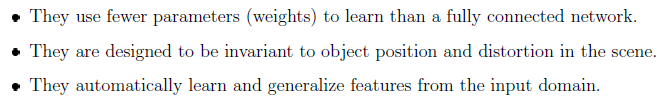

## Building Blocks of Convolutional Neural Networks

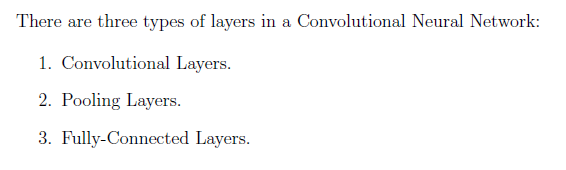

# Handwritten Image Recognition with CNN:

### Loading the MNIST Dataset in Keras:

In [ ]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap( 'gray' ))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap( 'gray' ))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap( 'gray' ))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap( 'gray' ))
# show the plot
plt.show()

## 5.12.1: Baseline Model using Multilayer Perceptrons:

### Import classes and functions:

In [ ]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

### Setting up the random seed:

In [ ]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

### Loading the Data:

In [ ]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Flatten 28*28 images into a 784 vector for each image

In [ ]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype( 'float32' )
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype( 'float32' )

### Normalize inputs from 0~255

In [ ]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

### Generating One-Hot Encoded Outputs

In [ ]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

### The Baseline Model"

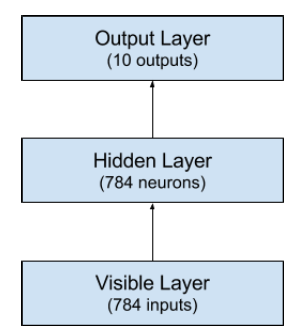

In [ ]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, init= 'normal' , activation= 'relu' ))
    model.add(Dense(num_classes, init= 'normal' , activation= 'softmax' ))
    # Compile model
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model

### Fitting the Baseline model:

In [ ]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=200,
verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

## 5.12.2: Simple Convolutional Neural Network for MNIST:

### Import classes and functions:

In [ ]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

### Setting up the random seed:

In [ ]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

### Loading Data as Images:

In [ ]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][channels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype( 'float32' )
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype( 'float32' )

### Normalize Inputs and One Hot Encode Outputs:

In [ ]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

### Simple Convolutional Neural Network Structure:

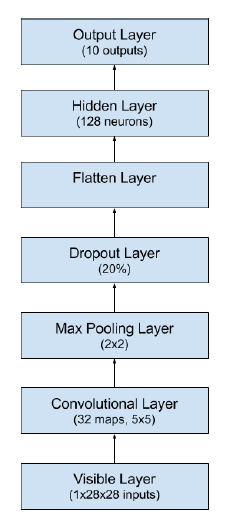

### Defining the model:

In [ ]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Convolution2D(32, 5, 5, border_mode= 'valid' , input_shape=(1, 28, 28),activation= 'relu' ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation= 'relu' ))
    model.add(Dense(num_classes, activation= 'softmax' ))
    # Compile model
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model

### Building and Training the model:

In [ ]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=200,verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)

## 5.12.3: Implementing a Larger Convolutional Neural Network

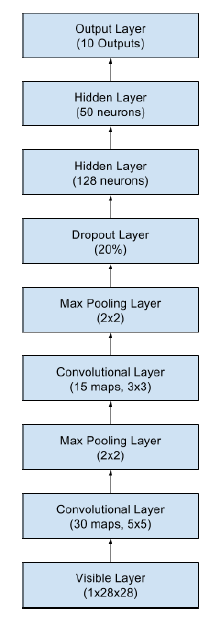

In [ ]:
# Larger CNN for the MNIST Dataset
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering( 'th' )

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype( 'float32' )
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype( 'float32' )

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# define the larger model
def larger_model():
    # create model
    model = Sequential()
    model.add(Convolution2D(30, 5, 5, input_shape=(1, 28, 28), activation= 'relu' ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(15, 3, 3, activation= 'relu' ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation= 'relu' ))
    model.add(Dense(50, activation= 'relu' ))
    model.add(Dense(num_classes, activation= 'softmax' ))

    # Compile model
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model

# build the model
model = larger_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=200,verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))